# Spectral clustering

Spectral clustering is a technique in machine learning for grouping objects into clusters that are similar to each other. Unlike traditional clustering methods like K-means, spectral clustering doesn't make strong assumptions about the form of the clusters. 

It is particularly useful when the structure of the individual clusters is highly irregular or more complex than globular shapes (like the data shown below). It's also useful for clustering graphs (like social networks). However, it can be computationally expensive for very large datasets and sensitive to the choice of similarity metric and the number of clusters specified.

Below, we will demonstrate spectral clustering with `scikit-learn`.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from copy import deepcopy
from scipy.spatial.distance import euclidean
from sklearn import datasets

sns.set(font_scale=1.2)
sns.set_style("whitegrid", {'grid.linestyle':'--'})

In [2]:
random_state = 42
np.random.seed(random_state)

n_samples = 1000
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=random_state)

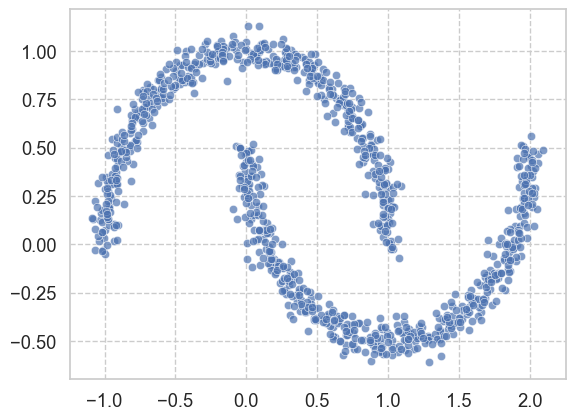

In [3]:
# noisy moon
plt.figure()
sns.scatterplot(x=noisy_moons[0][:, 0], y=noisy_moons[0][:, 1], alpha=0.7)
plt.show()

/Users/changyaochen/.pyenv/versions/3.10.11/envs/venv/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


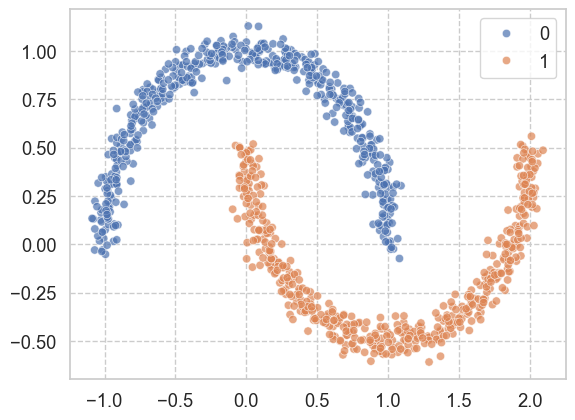

In [4]:
# Use scikit-learn
from sklearn.cluster import SpectralClustering

sc = SpectralClustering(
    n_clusters=2, 
    affinity="nearest_neighbors", 
    random_state=42
)
labels = sc.fit_predict(noisy_moons[0])

plt.figure()
sns.scatterplot(
    x=noisy_moons[0][:, 0], 
    y=noisy_moons[0][:, 1], 
    hue=labels,
    alpha=0.7
)
plt.show()

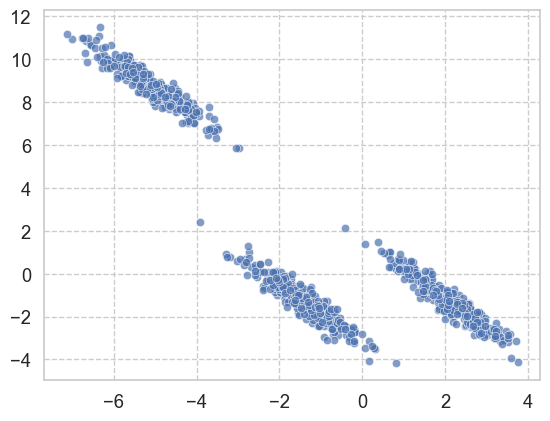

In [5]:
# Anisotropicly distributed data
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

plt.figure()
sns.scatterplot(x=X_aniso[:, 0], y=X_aniso[:, 1], alpha=0.7)
plt.show()

/Users/changyaochen/.pyenv/versions/3.10.11/envs/venv/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


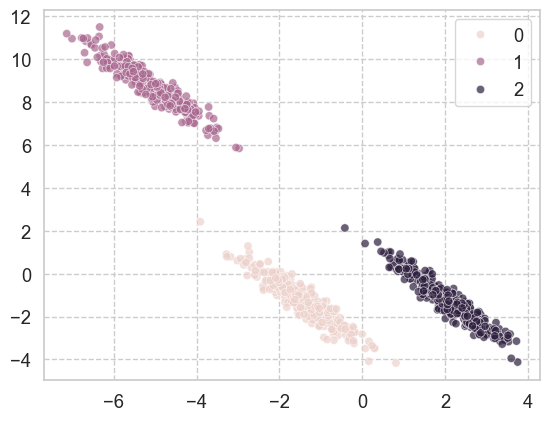

In [6]:
sc = SpectralClustering(
    n_clusters=3, 
    affinity="nearest_neighbors", 
    random_state=42
)
labels = sc.fit_predict(X_aniso)

plt.figure()
sns.scatterplot(
    x=X_aniso[:, 0], 
    y=X_aniso[:, 1], 
    hue=labels,
    alpha=0.7
)
plt.show()